# Análisis de Datos - Trabajo Práctico Integrador
* Dataset: 
    * LEGO Database (https://www.kaggle.com/datasets/rtatman/lego-database) 
* Objetivos: 
    * Analizar cómo evolucionaron los sets de lego en tamaño a través de los años.
    * Analizar cómo evolucionaron los colores en los sets de lego a través de los años.
    * Predecir el año de salida de un set.

In [1]:
import os
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
from sklearn import preprocessing

# Análisis exploratorio inicial
El objetivo de esta sección es identificar las variables de entrada y salida del problema, los tipos de datos y la relevancia de su información para la creación de un set de datos unificado que pueda usarse para un problema de clasificación.

## Descripción del dataset


Esta base de datos se compone por 7 archivos en formato CSV, que se relacionan entre si como se muestra en el siguiente esquema:

<img src="/Users/andavaro/Desktop/Andrès/UBA/Anàlisis de Datos/downloads_schema.png">

In [2]:
#Importar dataset
sets = pd.read_csv('./data/sets.csv')
parts = pd.read_csv('./data/parts.csv')
colors = pd.read_csv('./data/colors.csv')
themes = pd.read_csv('./data/themes.csv')
inventories = pd.read_csv('./data/inventories.csv')
inventory_sets = pd.read_csv('./data/inventory_sets.csv')
inventory_parts = pd.read_csv('./data/inventory_parts.csv')

## Identificación de datos por tabla

### Tabla sets

In [3]:
sets.head(5)

,set_num,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,1970,414,471
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [4]:
sets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11673 entries, 0 to 11672
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   set_num    11673 non-null  object
 1   name       11673 non-null  object
 2   year       11673 non-null  int64 
 3   theme_id   11673 non-null  int64 
 4   num_parts  11673 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 456.1+ KB


In [5]:
print('Número de sets diferentes: ', sets['set_num'].unique().shape[0])
print('Número de temas diferentes: ', sets['theme_id'].unique().shape[0])

Número de sets diferentes:  11673
Número de temas diferentes:  575


#### Tipos de datos en la tabla:
* Variables numéricas:
    * num_parts: número de piezas que contiene un set (int64)
    * year: año de lanzamiento de un set (int64)
* Variables categóricas:
    * set_num: código único que identifica cada set (object)
    * name: nombre del set (object)
    * theme_id: código que indica la temática del set (int64)


### Tabla parts

In [6]:
parts.head(5)

,part_num,name,part_cat_id
0,0687b1,Set 0687 Activity Booklet 1,17
1,0901,Baseplate 16 x 30 with Set 080 Yellow House Print,1
2,0902,Baseplate 16 x 24 with Set 080 Small White Hou...,1
3,0903,Baseplate 16 x 24 with Set 080 Red House Print,1
4,0904,Baseplate 16 x 24 with Set 080 Large White Hou...,1


In [7]:
parts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25993 entries, 0 to 25992
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   part_num     25993 non-null  object
 1   name         25993 non-null  object
 2   part_cat_id  25993 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 609.3+ KB


In [8]:
print('Número de partes diferentes: ', parts.part_num.unique().shape[0])
print('Número de categorías diferentes: ', parts.part_cat_id.unique().shape[0])

Número de partes diferentes:  25993
Número de categorías diferentes:  57


#### Tipos de datos en la tabla:
* Variables categóricas:
    * part_num: código único que identifica una pieza (object)
    * name: nombre de la pieza (object)
    * part_cat_id: código que indica la categoría de una pieza (int64)


### Tabla colors

In [9]:
colors

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f
...,...,...,...,...
130,1004,Trans Flame Yellowish Orange,FCB76D,t
131,1005,Trans Fire Yellow,FBE890,t
132,1006,Trans Light Royal Blue,B4D4F7,t
133,1007,Reddish Lilac,8E5597,f


In [10]:
colors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        135 non-null    int64 
 1   name      135 non-null    object
 2   rgb       135 non-null    object
 3   is_trans  135 non-null    object
dtypes: int64(1), object(3)
memory usage: 4.3+ KB


In [11]:
print('Número de colores diferentes: ', colors.id.unique().shape[0])

Número de colores diferentes:  135


#### Tipos de datos en la tabla:
* Variables categóricas:
    * id: código único que identifica cada color (int64)
    * name: nombre del color (object)
    * rgb: código que indica el color en RGB (object)
    * is_trans: indica si el color es translúcido (object)


### Tabla themes

In [12]:
themes.head(5)

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [13]:
themes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         614 non-null    int64  
 1   name       614 non-null    object 
 2   parent_id  503 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 14.5+ KB


In [14]:
print('Número de temas diferentes: ', themes.id.unique().shape[0])
print('Número de grupos temáticos diferentes: ', themes.parent_id.unique().shape[0])

Número de temas diferentes:  614
Número de grupos temáticos diferentes:  79


#### Tipos de datos en la tabla:
* Variables categóricas:
    * id: código único que identifica cada tema (int64)
    * name: nombre del tema (object)
    * parent_id: código que indica el grupo temático al que pertenece el tema (111 datos faltantes) (float64)


### Tabla inventories

In [15]:
inventories.head(5)

,id,version,set_num
0,1,1,7922-1
1,3,1,3931-1
2,4,1,6942-1
3,15,1,5158-1
4,16,1,903-1


In [16]:
inventories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11681 entries, 0 to 11680
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       11681 non-null  int64 
 1   version  11681 non-null  int64 
 2   set_num  11681 non-null  object
dtypes: int64(2), object(1)
memory usage: 273.9+ KB


In [17]:
print('Número de inventarios diferentes: ', inventories.id.unique().shape[0])
print('Número de sets diferentes: ', inventories.set_num.unique().shape[0])

Número de inventarios diferentes:  11681
Número de sets diferentes:  11670


#### Tipos de datos en la tabla:
* Variables categóricas:
    * id: código único que identifica un inventario (int64)
    * version: número de versión del inventario (int64)
    * set_num: código único que identifica cada set (object)


### Tabla inventory sets

In [18]:
inventory_sets.head(5)

,inventory_id,set_num,quantity
0,35,75911-1,1
1,35,75912-1,1
2,39,75048-1,1
3,39,75053-1,1
4,50,4515-1,1


In [19]:
inventory_sets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2846 entries, 0 to 2845
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   inventory_id  2846 non-null   int64 
 1   set_num       2846 non-null   object
 2   quantity      2846 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 66.8+ KB


In [20]:
print('Número de inventarios diferentes: ', inventory_sets.inventory_id.unique().shape[0])
print('Número de sets diferentes: ', inventory_sets.set_num.unique().shape[0])


Número de inventarios diferentes:  589
Número de sets diferentes:  2306


#### Tipos de datos en la tabla:
* Variables numéricas:
    * quantity: cantidad de inventarios incluidos (int64)
* Variables categóricas:
    * inventory_id: código único que identifica cada inventario (int64)
    * set_num: código único que identifica cada set (object)


### Tabla inventory parts

In [21]:
inventory_parts.head(5)

,inventory_id,part_num,color_id,quantity,is_spare
0,1,48379c01,72,1,f
1,1,48395,7,1,f
2,1,mcsport6,25,1,f
3,1,paddle,0,1,f
4,3,11816pr0005,78,1,f


In [22]:
inventory_parts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580251 entries, 0 to 580250
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   inventory_id  580251 non-null  int64 
 1   part_num      580251 non-null  object
 2   color_id      580251 non-null  int64 
 3   quantity      580251 non-null  int64 
 4   is_spare      580251 non-null  object
dtypes: int64(3), object(2)
memory usage: 22.1+ MB


In [23]:
print('Número de inventarios diferentes: ', inventory_parts.inventory_id.unique().shape[0])
print('Número de partes diferentes: ', inventory_parts.part_num.unique().shape[0])


Número de inventarios diferentes:  10724
Número de partes diferentes:  23131


#### Tipos de datos en la tabla:
* Variables numéricas:
    * quantity: número de veces que hay una pieza en un inventario (int64)
* Variables categóricos:
    * inventory_id: código único que identifica cada inventario (int64)
    * part_num: código que identifica una pieza (object)
    * color_id: código que indica el color de una pieza (int64)
    * is_spare: código que indica si una pieza es un repuesto (object)


## Identificación de variables

### Variables de entrada

### Variables de salida

## Dataset unificado

En el análisis individual de cada tabla de datos, se observó que existen nombres repetidos para datos diferentes, por lo que se hace necesario renombrar algunos de ellos

In [24]:
themes = themes.rename(columns= {'id': 'theme_id'})
themes = themes.rename(columns= {'name': 'theme_name'})
colors = colors.rename(columns  = {'id': 'color_id'})
colors = colors.rename(columns  = {'name': 'color_name'})
parts = parts.rename(columns={'name': 'part_name'})
inventory_parts = inventory_parts.rename(columns= {'inventory_id': 'id'})

Se filtran los datos correspondientes a piezas de repuesto, con el fin de que no afecten en el conteo final del número de piezas que conforman un set

In [25]:
filtro_spare = inventory_parts['is_spare'] != 't'
inventory_parts = inventory_parts[filtro_spare]

Se hace un one hot encoder a la tabla inventory_parts para determinar que colores usa cada set y crear la variable num_colors que determina cuantos colores diferentes tiene un set

In [26]:
color_ohe = inventory_parts.groupby(["id", "color_id"]).quantity.sum().reset_index().pivot("id", "color_id", "quantity").fillna(0) != 0
color_ohe.columns = [f"color_{c}" for c in color_ohe.columns]
color_ohe[color_ohe==True]=1
color_ohe[color_ohe==False]=0
color_ohe['num_color']=color_ohe.sum(axis=1)
color_ohe.head()

,color_-1,color_0,color_1,color_2,color_3,color_4,color_5,color_6,color_7,color_8,...,color_462,color_484,color_503,color_1000,color_1001,color_1002,color_1003,color_1006,color_9999,num_color
id,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,4.0
3,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12.0
4,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.0
15,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
16,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.0


Se hace un one hot encoder a la tabla inventory_parts para determinar que piezas usa cada set y crear la variable num_parts_spareless, que determina cuantas piezas tiene un set sin contar los repuestos

In [27]:
parts_ohe = inventory_parts.groupby(["id", "part_num"]).quantity.sum().reset_index().pivot("id", "part_num", "quantity").fillna(0)
parts_ohe.columns = [f"part_{p}" for p in parts_ohe.columns]
fil= parts_ohe != 0
parts_ohe['num_parts_spareless']=parts_ohe.sum(axis=1)
parts_ohe[fil==True]=1
parts_ohe[fil==False]=0
parts_ohe.head()

,part_0687b1,part_0901,part_0902,part_0903,part_0904,part_1,part_10039,part_10048,part_10049,part_10049pr0001,...,part_x979pb01,part_x988,part_xleash,part_xleash3,part_zbb013,part_zbb014,part_zbb015,part_zbb018,part_zbb022,num_parts_spareless
id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0


Se unen las tablas de datos inventories, sets, themes y las variables num_color y num_parts_spareless obtenidas en los one hot encoder de inventory_parts, que contienen información relevante para desarrolar los objetivos. No se tienen en cuenta las tablas parts, colors y inventory_sets porque se considera que contienen información redundante

In [66]:
final_df=pd.merge(inventories, sets, on='set_num', how='inner')
final_df=pd.merge(final_df, themes, on='theme_id', how='inner')
final_df=pd.merge(final_df, color_ohe.num_color, on='id', how='inner')
final_df=pd.merge(final_df, parts_ohe.num_parts_spareless, on='id', how='inner')

Se ordena el dataset por id

In [67]:
final_df=final_df.sort_values(by=['id'])
final_df.head(5)

,id,version,set_num,name,year,theme_id,num_parts,theme_name,parent_id,num_color,num_parts_spareless
0,1,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4,Gravity Games,458.0,4.0,4.0
10,3,1,3931-1,Emma's Splash Pool,2012,494,43,Friends,NaN,12.0,43.0
200,4,1,6942-1,Zo Weevil,1999,134,20,Insectoids,126.0,5.0,20.0
218,15,1,5158-1,"T-Junction, Circle Plates",1990,454,2,Town,443.0,1.0,2.0
232,16,1,903-1,Train Wheels and Couplers,1969,371,10,Supplemental,365.0,2.0,10.0


# Limpieza y preparación de datos
El objetivo de esta sección es preparar el dataset para usarse en un problema de clasificación.

## Imputación de datos faltantes

Se verifica la existencia de datos faltantes

In [68]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10721 entries, 0 to 1482
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10721 non-null  int64  
 1   version              10721 non-null  int64  
 2   set_num              10721 non-null  object 
 3   name                 10721 non-null  object 
 4   year                 10721 non-null  int64  
 5   theme_id             10721 non-null  int64  
 6   num_parts            10721 non-null  int64  
 7   theme_name           10721 non-null  object 
 8   parent_id            7424 non-null   float64
 9   num_color            10721 non-null  float64
 10  num_parts_spareless  10721 non-null  float64
dtypes: float64(3), int64(5), object(3)
memory usage: 1005.1+ KB


Se verifica el número de datos faltantes

In [69]:
final_df.isnull().sum()

id                        0
version                   0
set_num                   0
name                      0
year                      0
theme_id                  0
num_parts                 0
theme_name                0
parent_id              3297
num_color                 0
num_parts_spareless       0
dtype: int64

Dado que parent_id representa el grupo temático al que pertenece cada tema, se considera que los datos faltantes corresponden a temas que no se clasifican en ningún grupo temático. Entonces, se hace una imputación de fin de cola, asignando a los datos faltantes la suma de su valor correspondiente en la columna theme_id y el valor máximo de parent_id

In [70]:
pid_max=final_df.parent_id.max()
filtro_nan = final_df['parent_id'].isnull() == True
final_df.parent_id[filtro_nan==True]=final_df.theme_id[filtro_nan==True]+pid_max

/var/folders/6n/sbw9wnvd5qb998th95671fsh0000gn/T/ipykernel_1038/4287427355.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.parent_id[filtro_nan==True]=final_df.theme_id[filtro_nan==True]+pid_max


0        False
10        True
200      False
218      False
232      False
         ...  
10652    False
1449      True
10649    False
10653    False
1474     False

Se verifica que ya no existen datos faltantes

In [71]:
final_df[['parent_id']].isnull().sum()

parent_id    0
dtype: int64

## Codificación de variables categóricas

Se hace un label encoder a parent_id para balancear mejor la clase después de la imputación de datos

In [72]:
encoder_parent = preprocessing.LabelEncoder()
final_df['parent_id']= encoder_parent.fit_transform(final_df['parent_id'])

Se hace un label encoder a set_num

In [73]:
encoder_set = preprocessing.LabelEncoder()
final_df['set_num']= encoder_set.fit_transform(final_df['set_num'])

Se verifica la distribución de las variables

In [74]:
def display_dataset_distributions(dataset):
    fig = dataset.hist(xlabelsize=12, ylabelsize=12,figsize=(22,10))
    [x.title.set_size(14) for x in fig.ravel()]
    plt.tight_layout()
    plt.show()

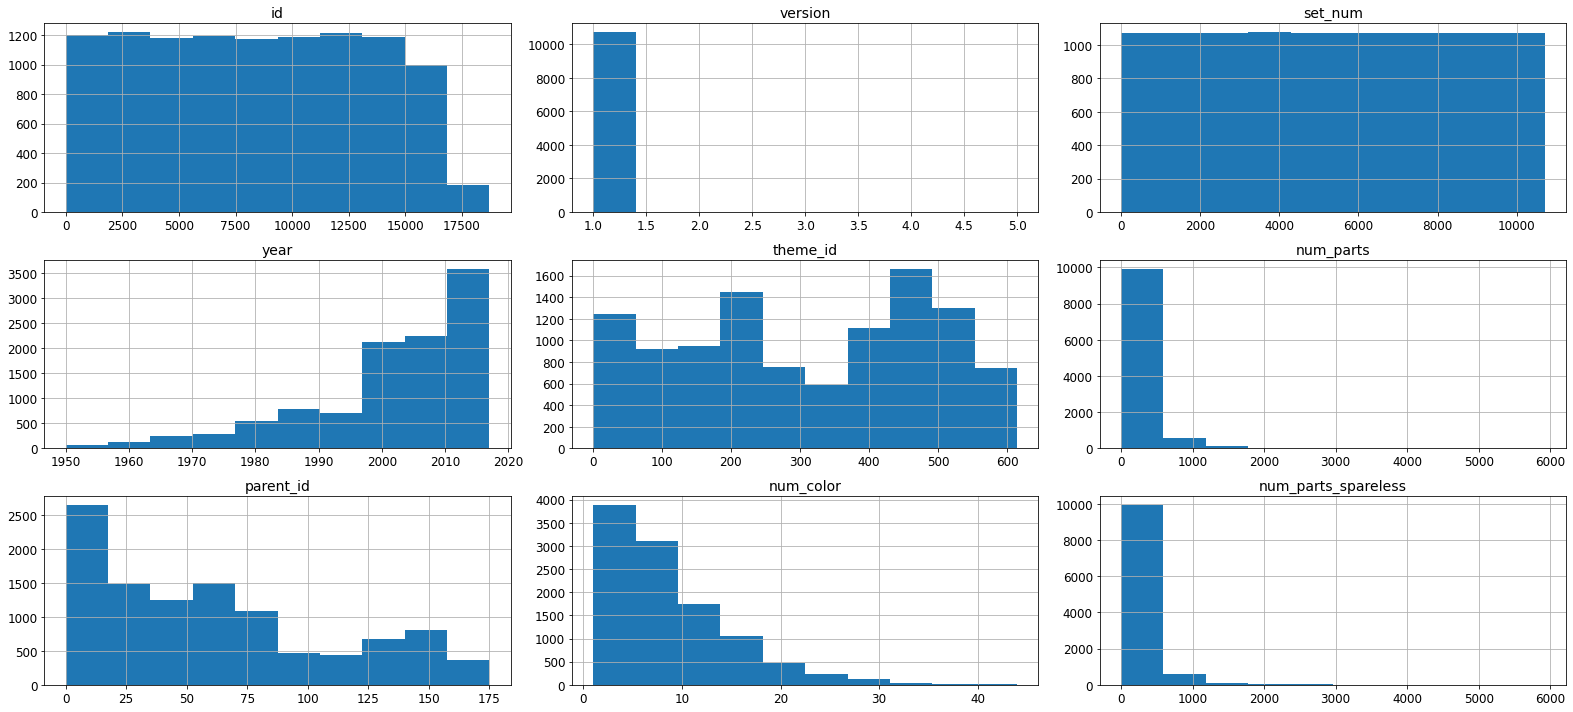

In [75]:
display_dataset_distributions(final_df)

Se elimina variables que contienen información redundante (id, name, theme_name, num_parts)

In [76]:
final_df = final_df.drop(['id', 'name', 'theme_name','num_parts'], axis=1)

Exportamos el dataset en un archivo CSV para poder utilizarlo posteriormente

In [77]:
os.makedirs('./data', exist_ok=True)  
final_df.to_csv('./data/lego_df.csv', index=False)

# Análisis de datos

## Tamaño de los sets a través de los años

Número de sets por año

Text(0, 0.5, 'Número de sets')

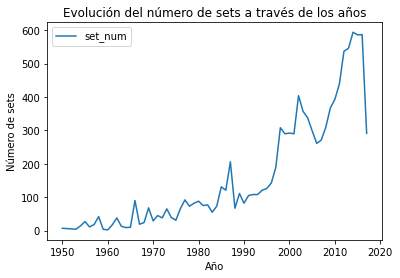

In [86]:
%matplotlib inline
sets_by_year = final_df.groupby(by=['year']).count().pivot_table(columns='year', values='set_num')
sets_by_year.T.plot()
plt.title('Evolución del número de sets a través de los años')
plt.xlabel('Año')
plt.ylabel('Número de sets')

Número de piezas por año

Text(0, 0.5, 'Número de piezas')

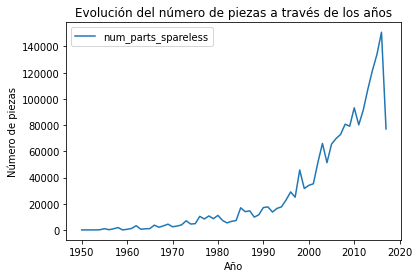

In [87]:
%matplotlib inline
parts_by_year = final_df.groupby(by=['year']).sum().pivot_table(columns='year', values='num_parts_spareless')
parts_by_year.T.plot()
plt.title('Evolución del número de piezas a través de los años')
plt.xlabel('Año')
plt.ylabel('Número de piezas')

Número de piezas promedio por año

Text(0.5, 0, 'Año')

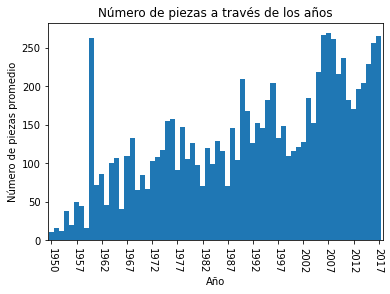

In [105]:
%matplotlib inline
parts_by_year = final_df.groupby('year').num_parts_spareless.mean()
parts_by_year.plot(kind='bar', width=1);
plt.xticks(list(range(0, 66, 5)), [final_df.sort_values(by=['year']).year.unique()[y] for y in list(range(0, 66, 5))],rotation=-90);
plt.title('Número de piezas a través de los años')
plt.ylabel('Número de piezas promedio')
plt.xlabel('Año')

Frecuencia en años que un numero de piezas promedio se repite

Text(0, 0.5, 'Años que se repite')

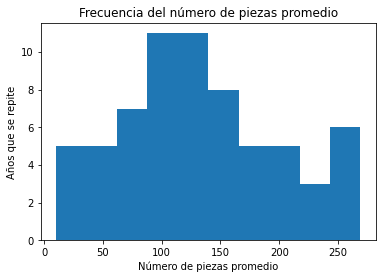

In [96]:
%matplotlib inline
parts_by_year = final_df.groupby('year').num_parts_spareless.mean()
parts_by_year.plot(kind='hist');
plt.title('Frecuencia del número de piezas promedio')
plt.xlabel('Número de piezas promedio')
plt.ylabel('Años que se repite')

## Colores en los sets a través de los años

Text(0, 0.5, 'Número de colores')

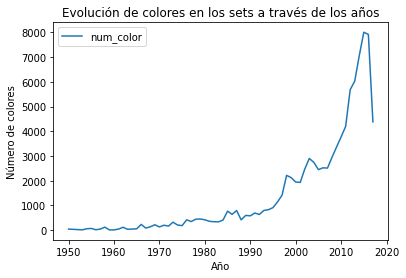

In [97]:
%matplotlib inline
colors_by_year = final_df.groupby(by=['year']).sum().pivot_table(columns='year', values='num_color')
colors_by_year.T.plot()
plt.title('Evolución de colores en los sets a través de los años')
plt.xlabel('Año')
plt.ylabel('Número de colores')

Text(0.5, 0, 'Año')

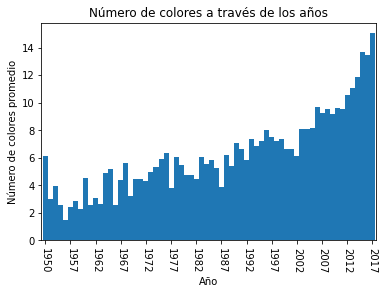

In [106]:
%matplotlib inline
colors_by_year = final_df.groupby('year').num_color.mean()
colors_by_year.plot(kind='bar', width=1);
plt.xticks(list(range(0, 66, 5)), [final_df.sort_values(by=['year']).year.unique()[y] for y in list(range(0, 66, 5))],rotation=-90);
plt.title('Número de colores a través de los años')
plt.ylabel('Número de colores promedio')
plt.xlabel('Año')

Text(0, 0.5, 'Años que se repite')

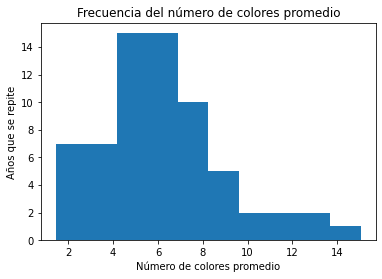

In [108]:
%matplotlib inline
colors_by_year = final_df.groupby('year').num_color.mean()
colors_by_year.plot(kind='hist');
plt.title('Frecuencia del número de colores promedio')
plt.xlabel('Número de colores promedio')
plt.ylabel('Años que se repite')